# ========================================
# 📌 1. Import Necessary Libraries
# ========================================

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE

# ========================================
# 📌 2. Load and Explore the Dataset
# ========================================

In [223]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\HR_Analytics.csv")

In [224]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [226]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,14298.460811,2.687162,15.210135,3.153378,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,7112.056802,2.494098,3.655338,0.360474,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8051.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,20460.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# ========================================
# 📌 3. Data Issues and Solutions
# ========================================

#### **Identified Issues:**
1. The **"YearsWithCurrManager"** column contains missing values.
2. Some **"EmpID"** values appear twice, with certain cases having different values for **"YearsWithCurrManager"**.
3. The **"BusinessTravel"** column contains inconsistent spelling, with both **"TravelRarely"** and **"Travel_Rarely"** as distinct values.

#### **Proposed Solutions:**
- Since missing values in **"YearsWithCurrManager"** likely indicate that the employee has not yet worked with their current manager, these values will be filled with **0**.
- For duplicate **"EmpID"** entries, the record with the **higher "YearsWithCurrManager"** value will be retained.
- The spelling inconsistency in **"BusinessTravel"** will be corrected by replacing **"TravelRarely"** with **"Travel_Rarely"** to maintain uniformity.

This preprocessing ensures data consistency and accuracy before proceeding with further analysis and model training.

In [227]:
df["YearsWithCurrManager"] = df["YearsWithCurrManager"].fillna(0)


In [228]:
# Đếm số lần xuất hiện của từng empID
emp_counts = df["EmpID"].value_counts()

# Lọc ra những empID xuất hiện từ 2 lần trở lên
duplicate_empIDs = emp_counts[emp_counts >= 2].index

# Lọc DataFrame theo danh sách empID trùng lặp
df_duplicates = df[df["EmpID"].isin(duplicate_empIDs)]

df_duplicates

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,5.0
210,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5k-10k,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3.0
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5k-10k,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3.0
327,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
457,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
654,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,Upto 5k,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2.0
655,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,Upto 5k,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2.0


In [229]:
df = df.sort_values(by=["YearsWithCurrManager"], ascending=False).drop_duplicates(subset=["EmpID"], keep="first")

In [230]:
df["BusinessTravel"] = df["BusinessTravel"].replace("TravelRarely", "Travel_Rarely")

# ========================================
# 📌 4. Exploratory Data Analysis (EDA)
# ========================================

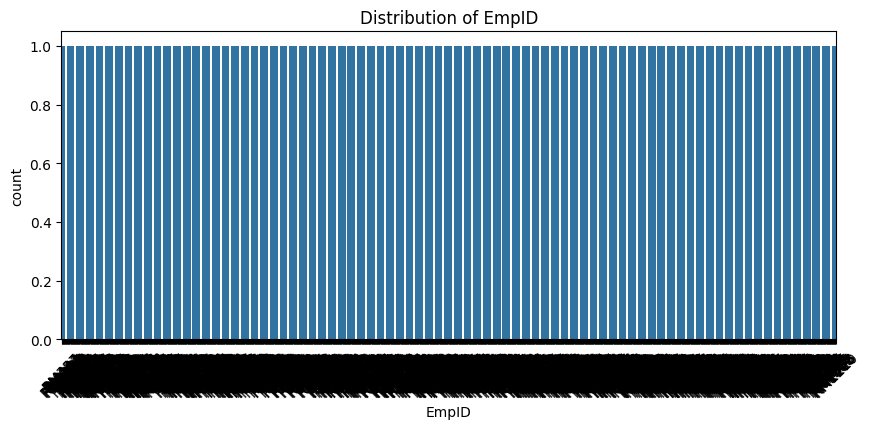

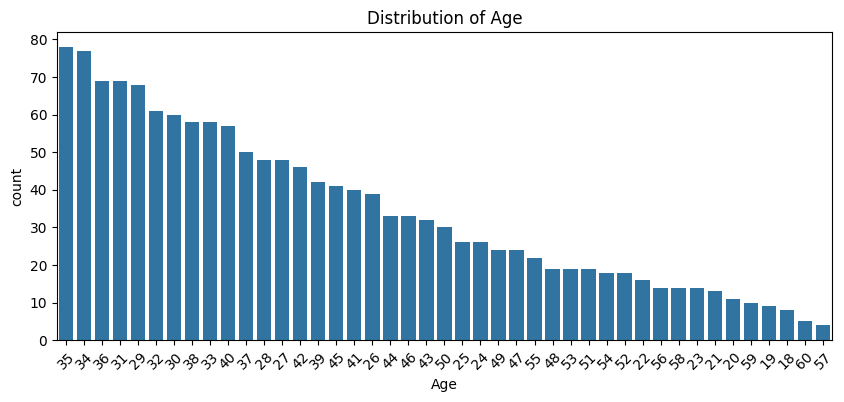

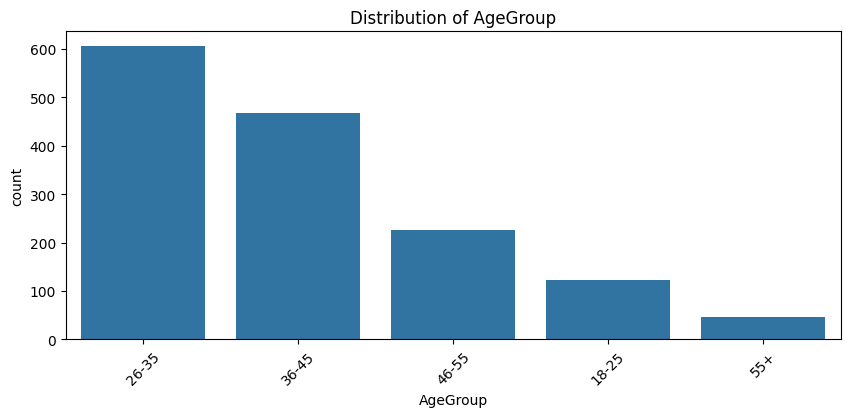

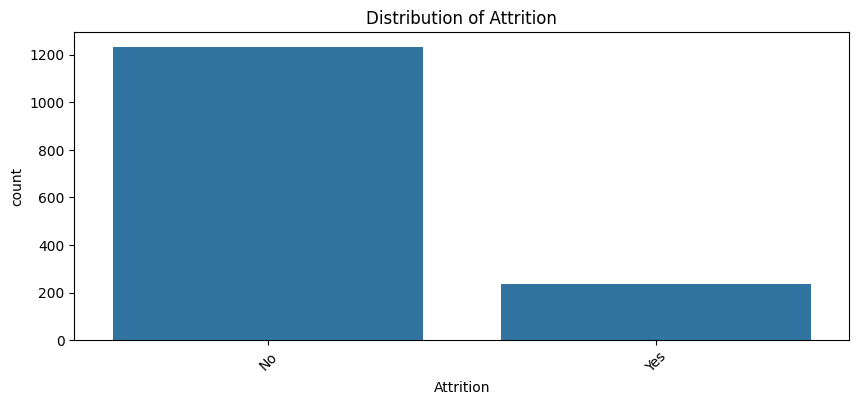

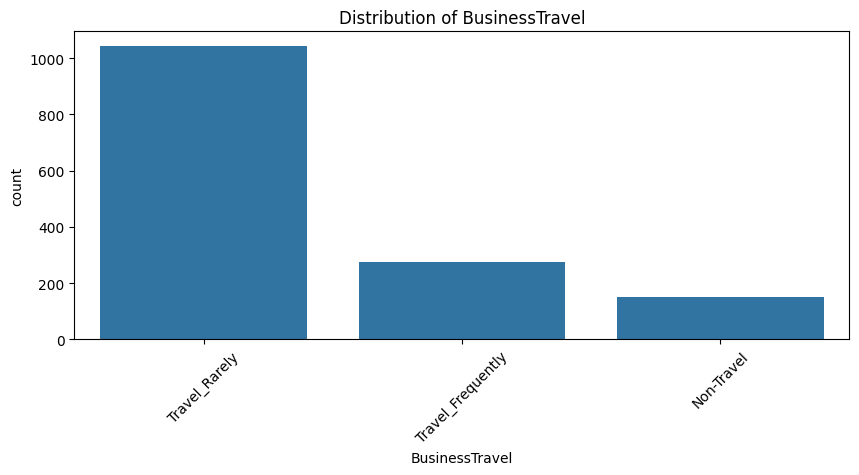

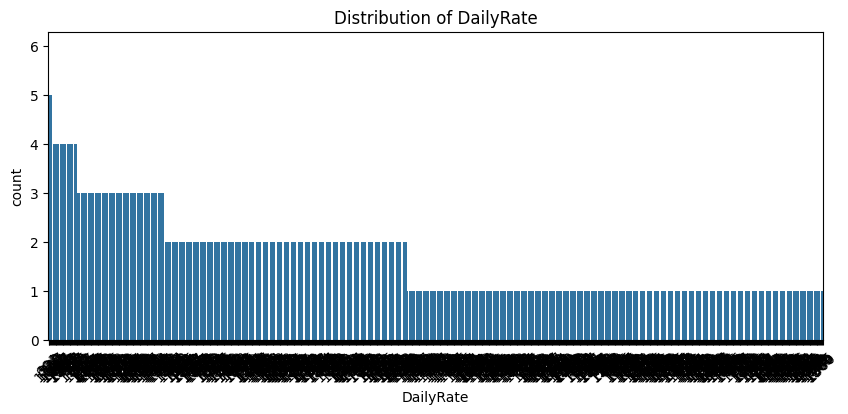

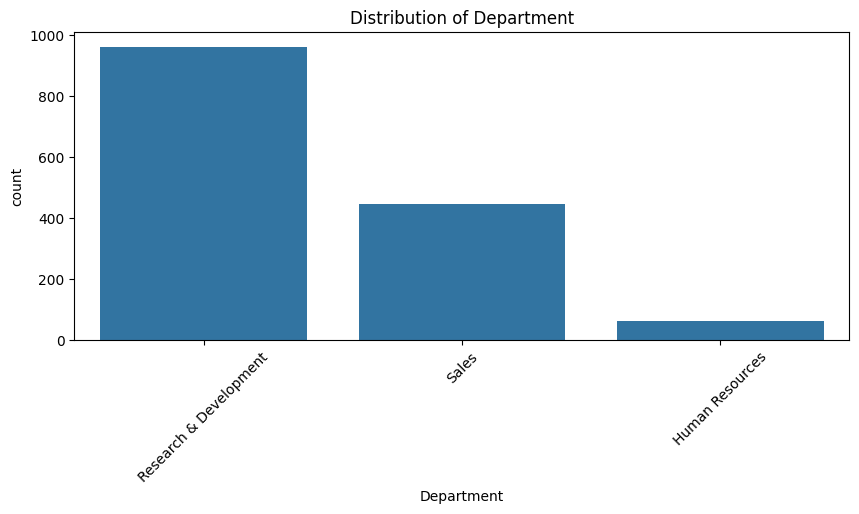

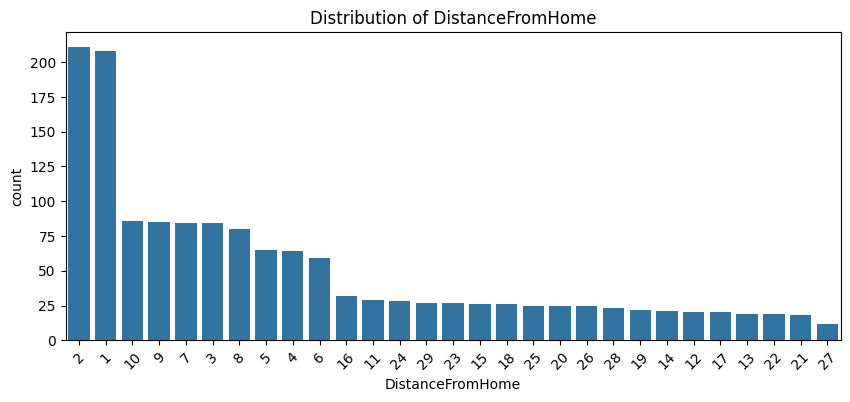

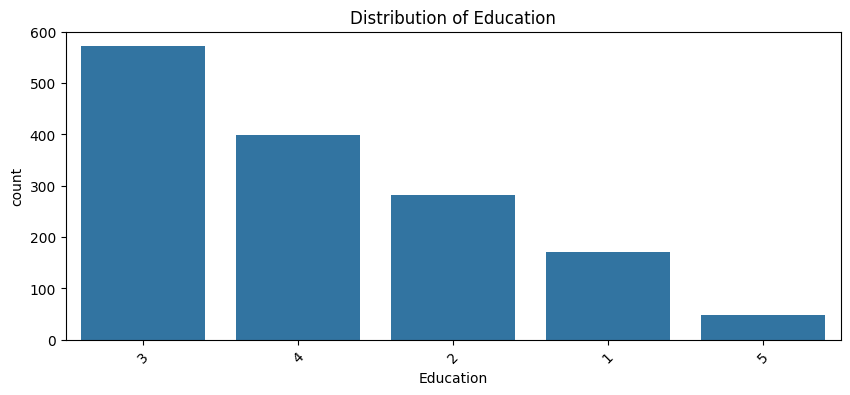

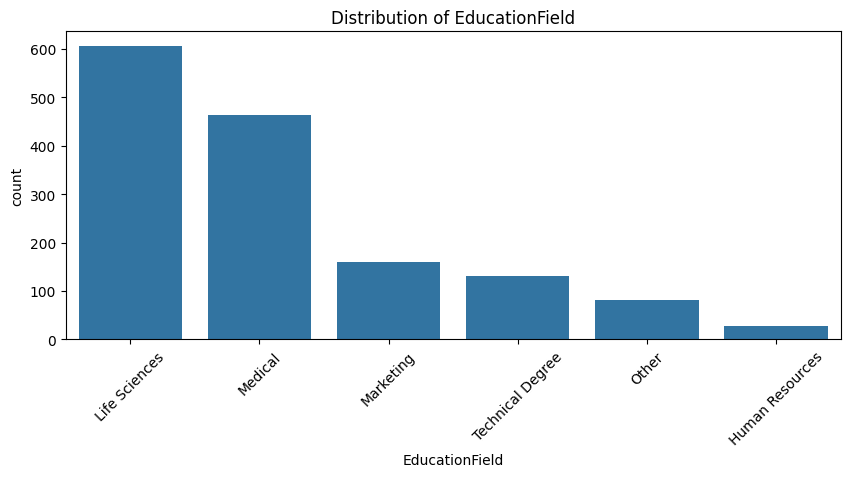

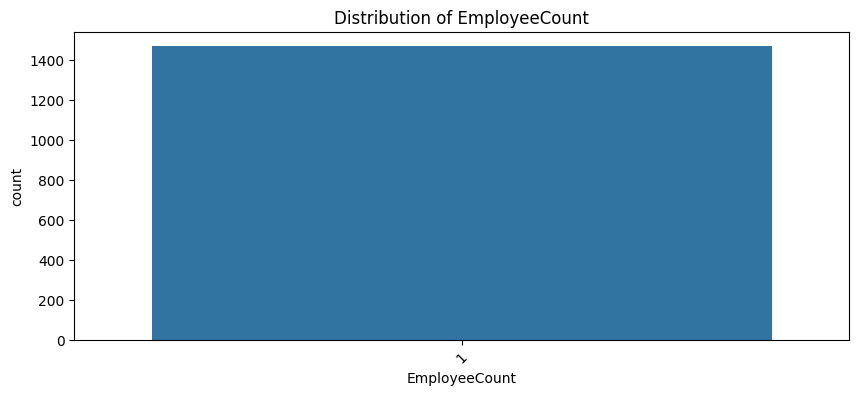

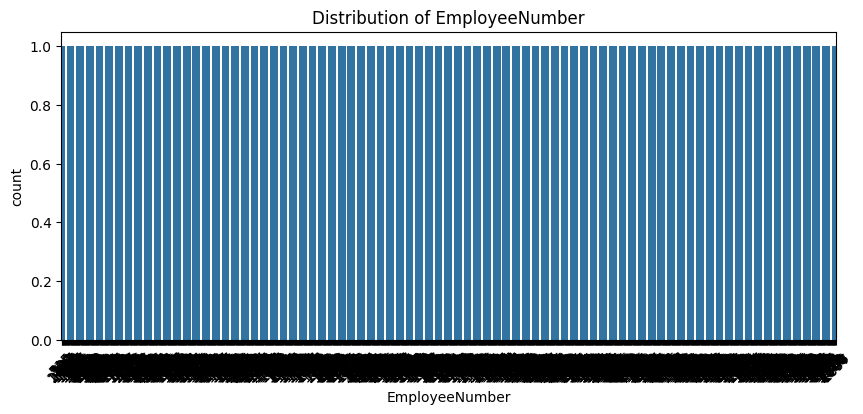

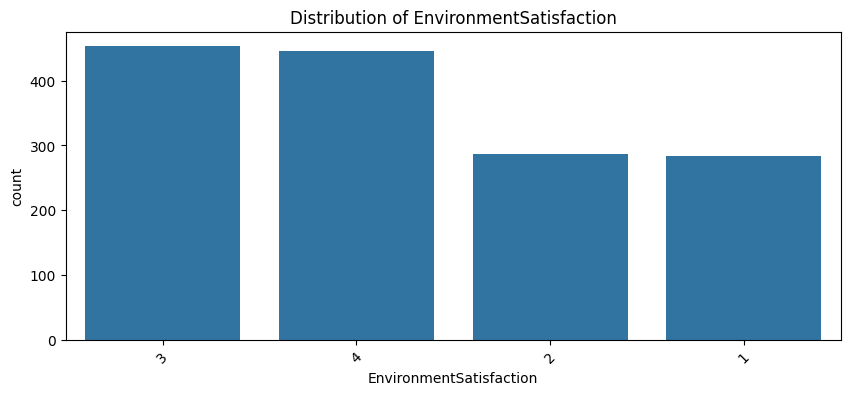

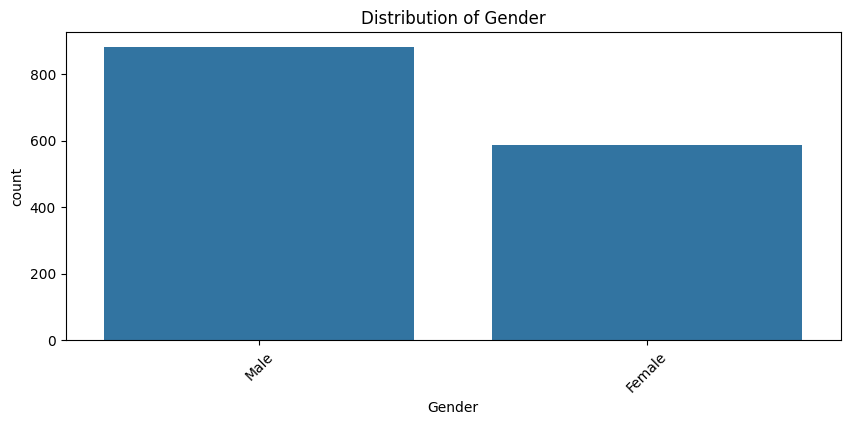

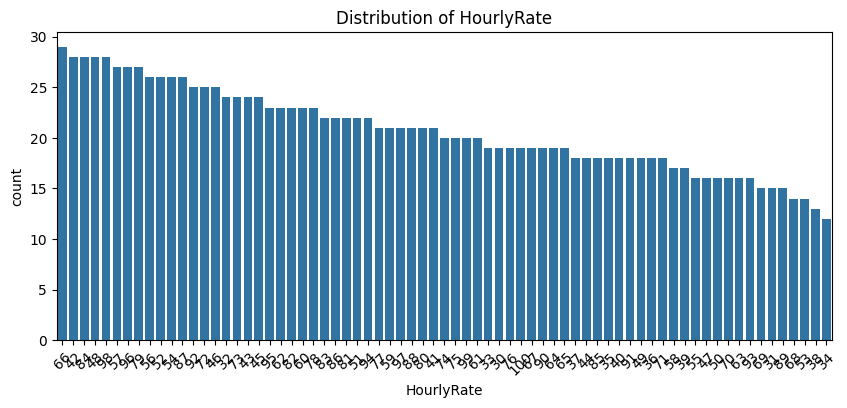

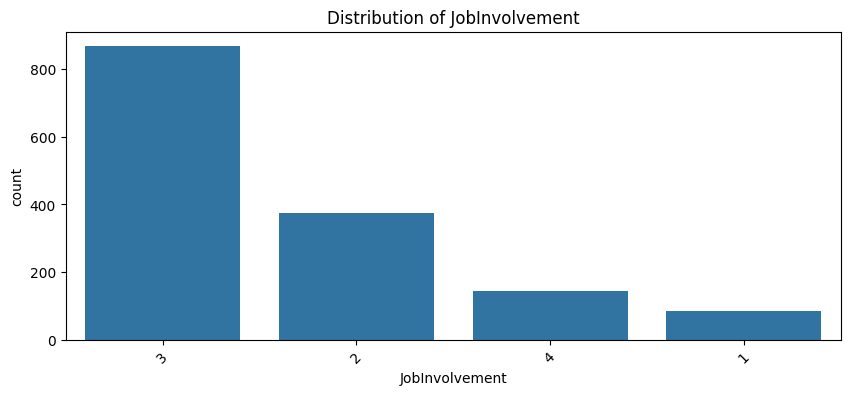

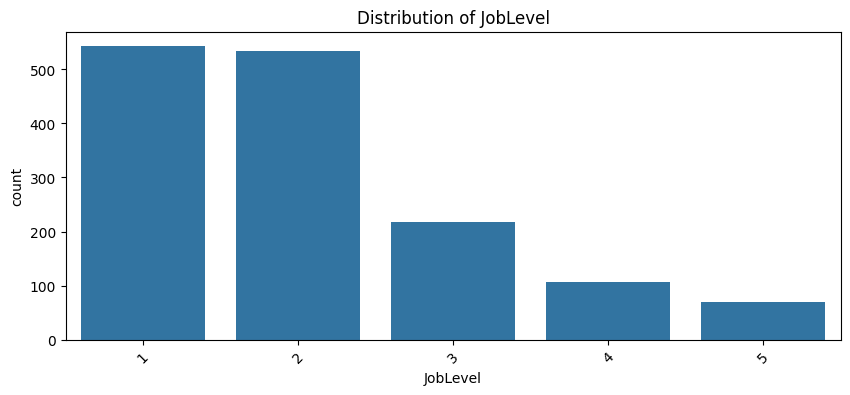

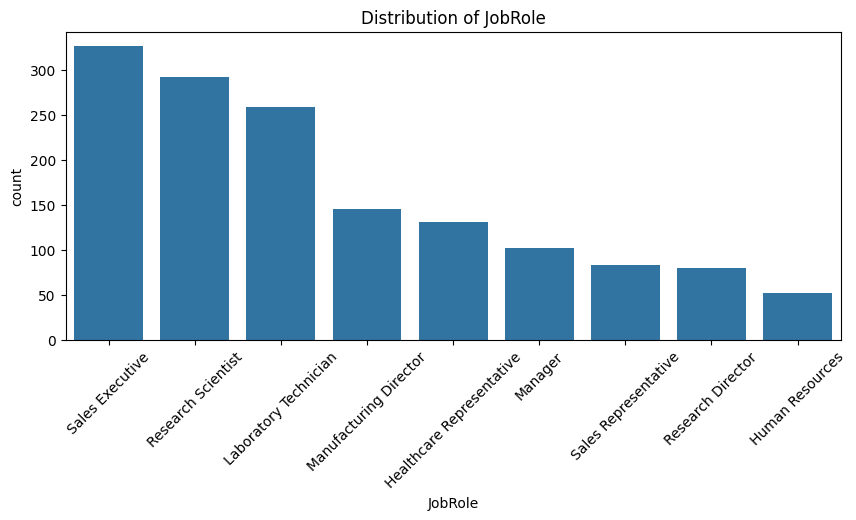

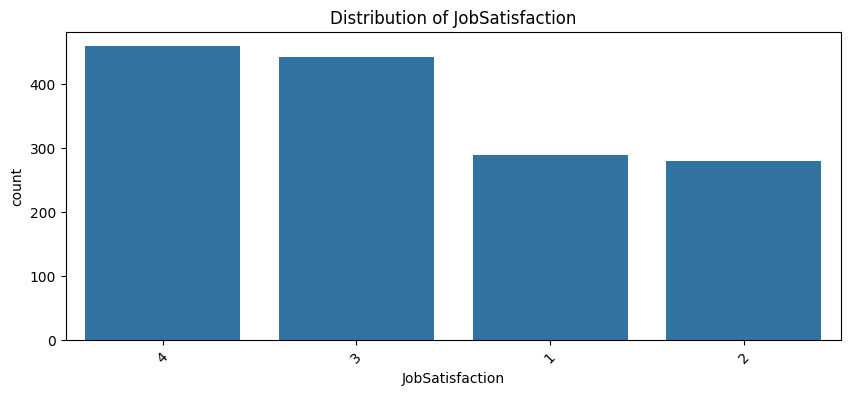

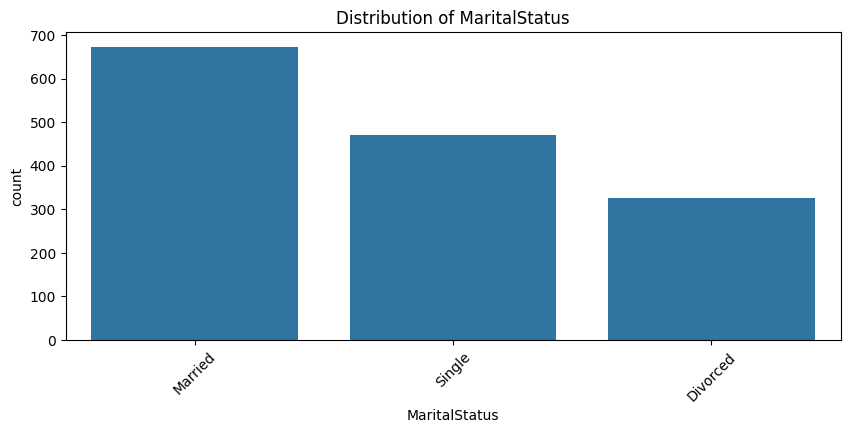

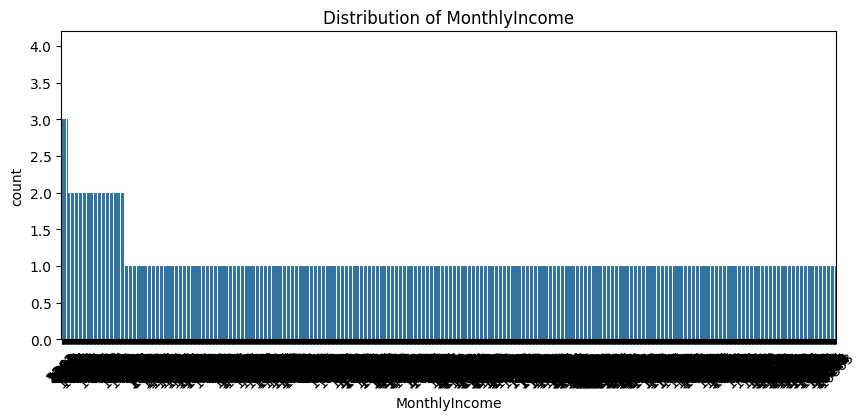

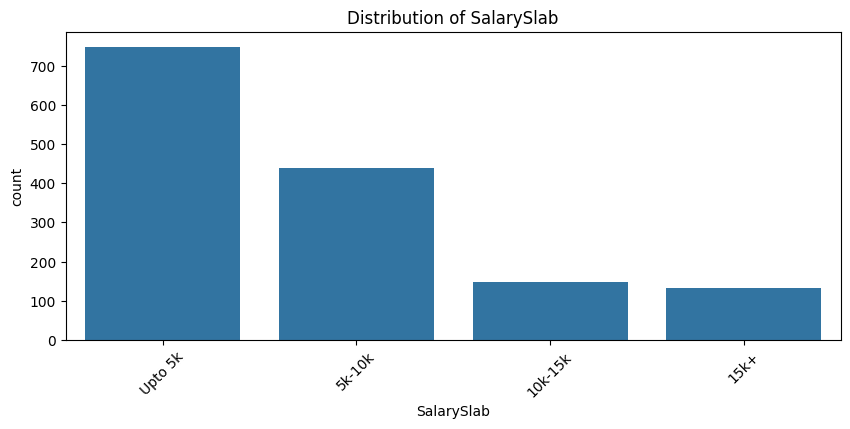

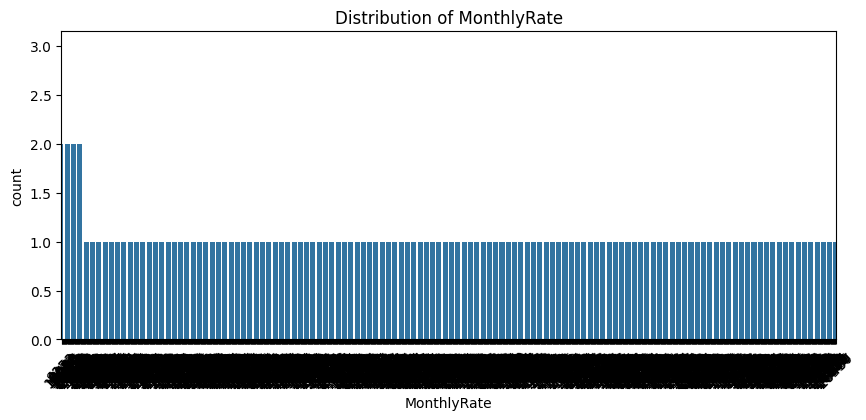

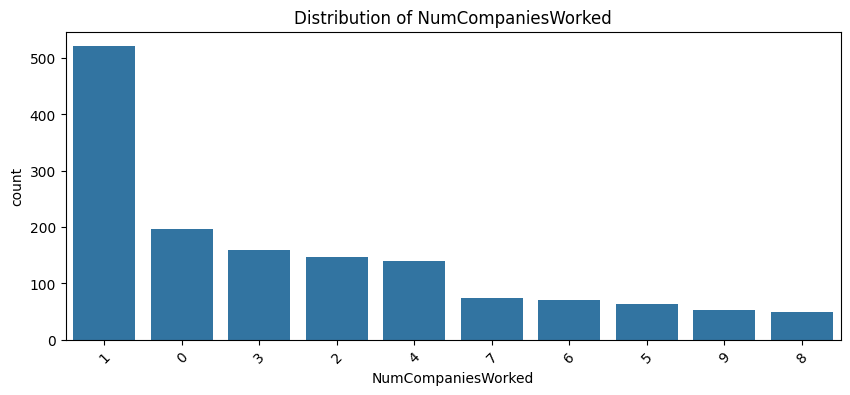

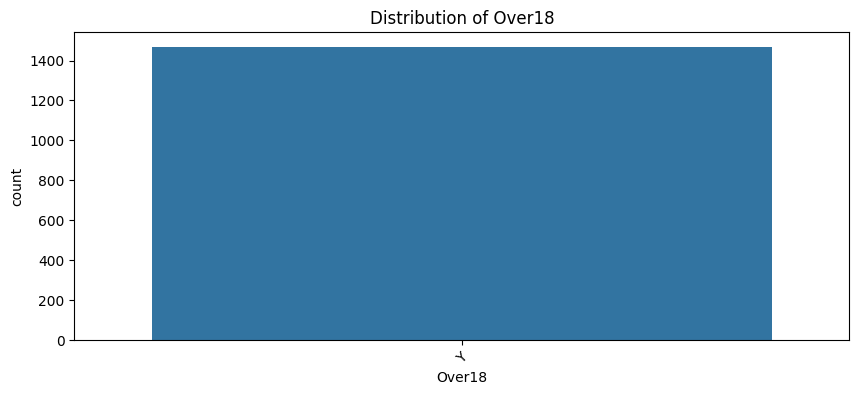

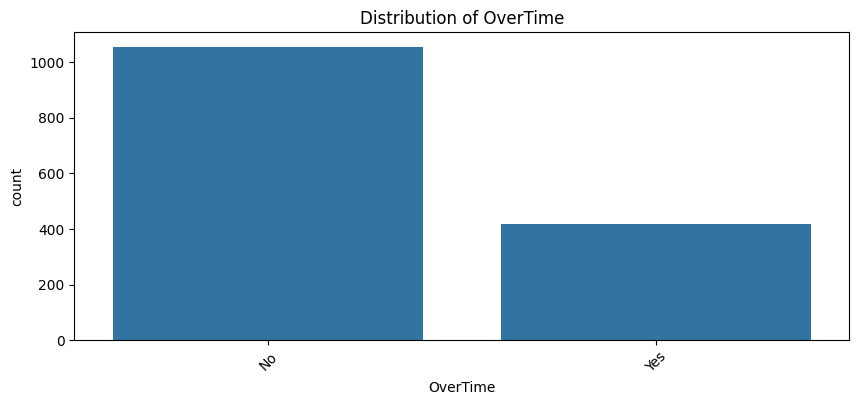

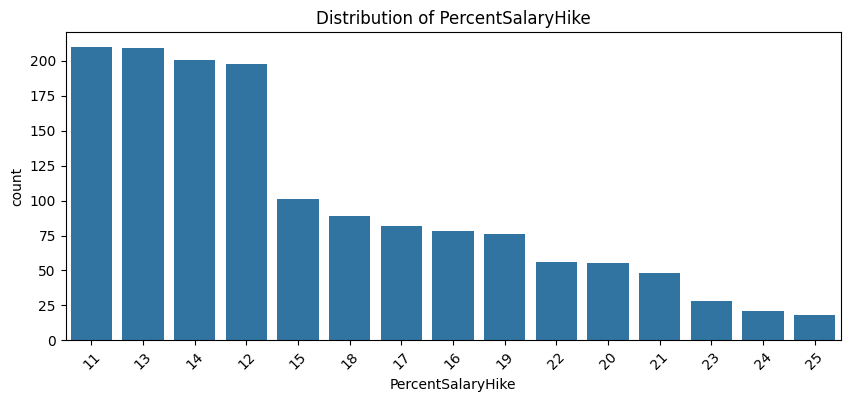

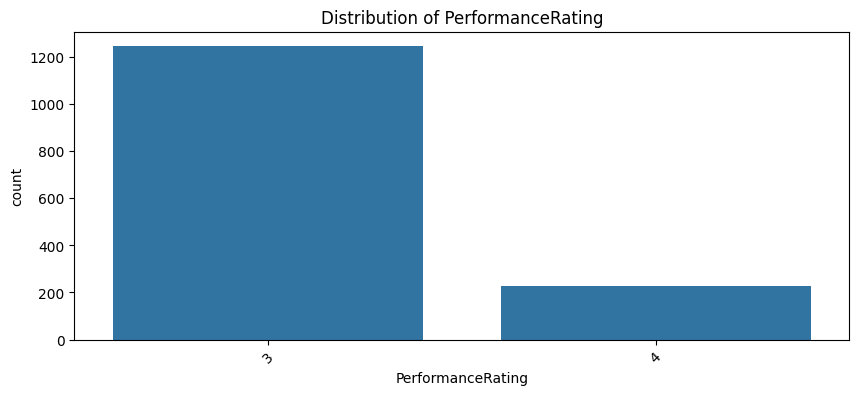

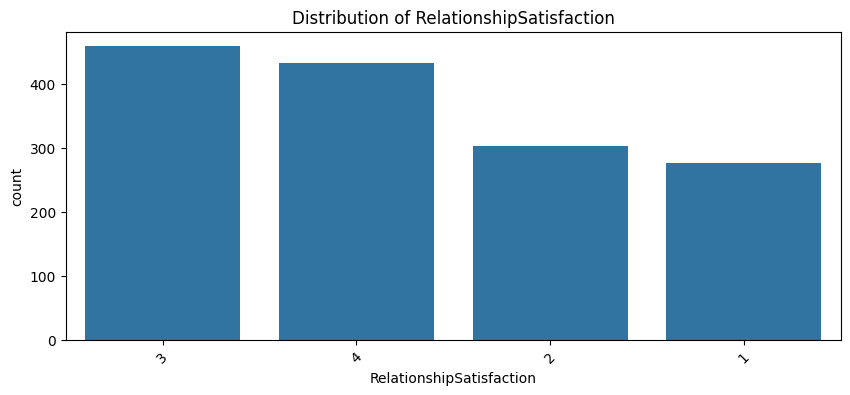

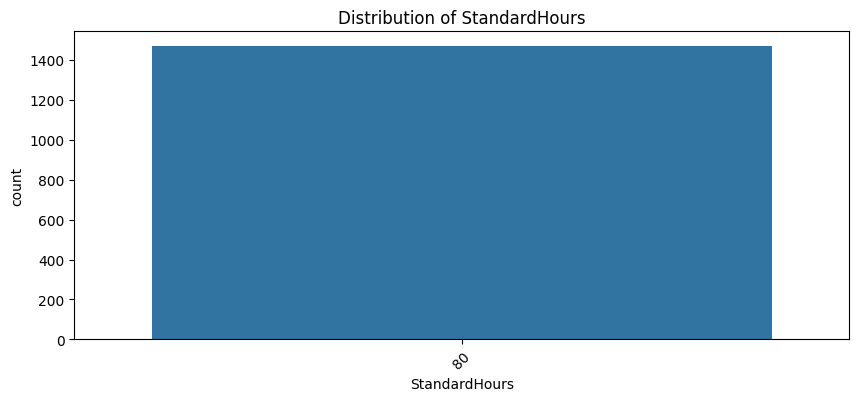

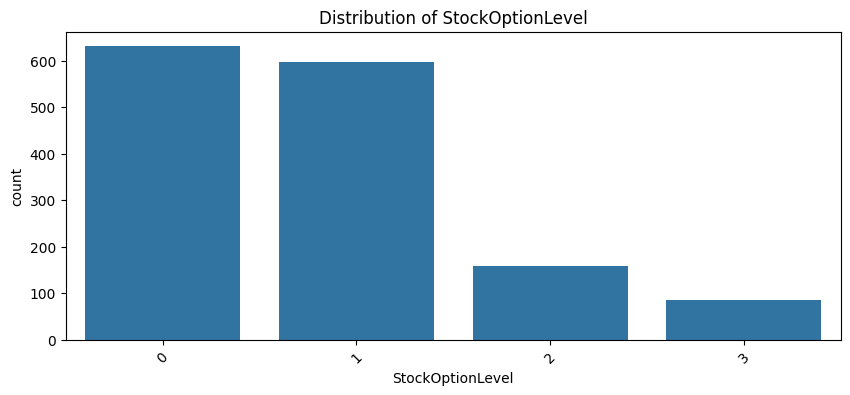

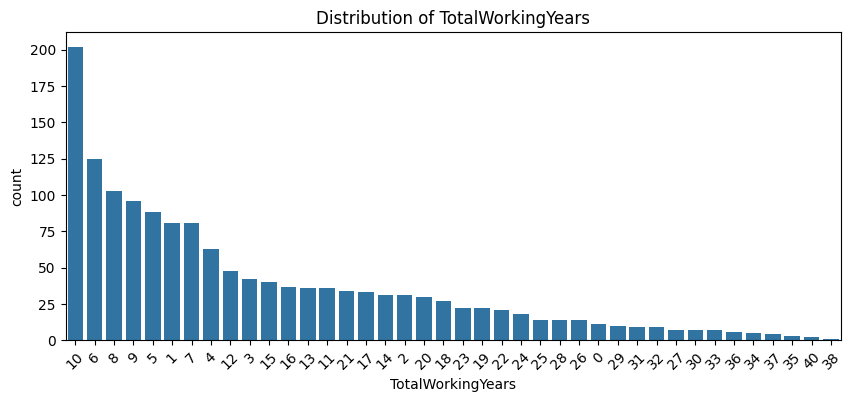

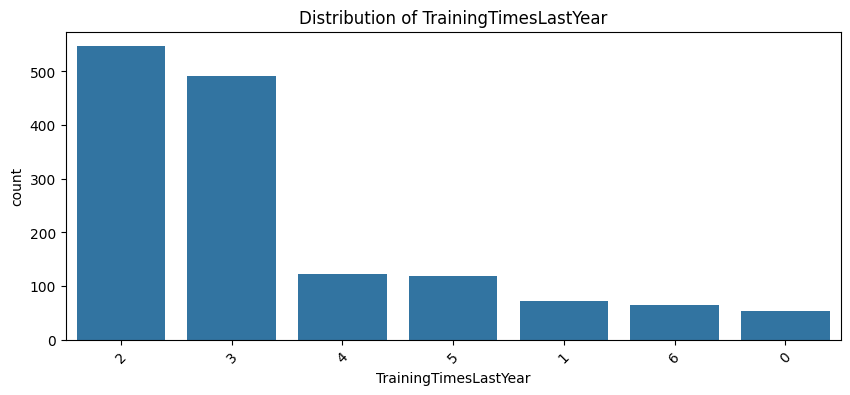

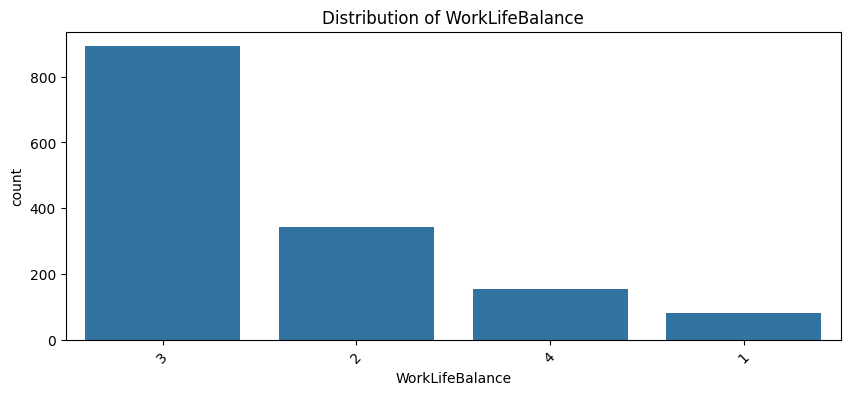

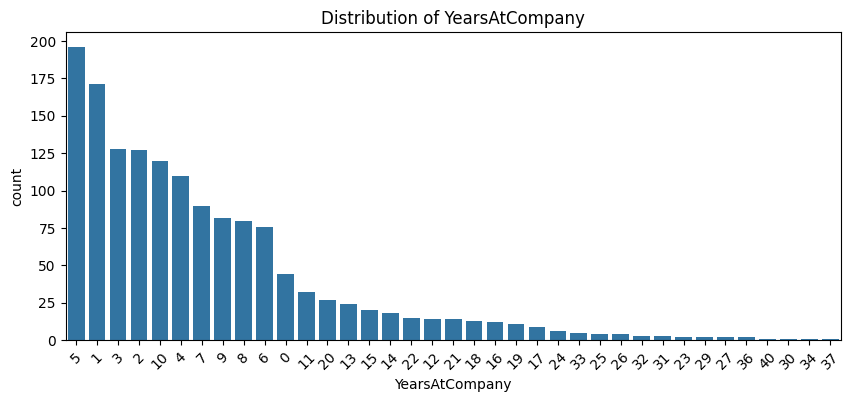

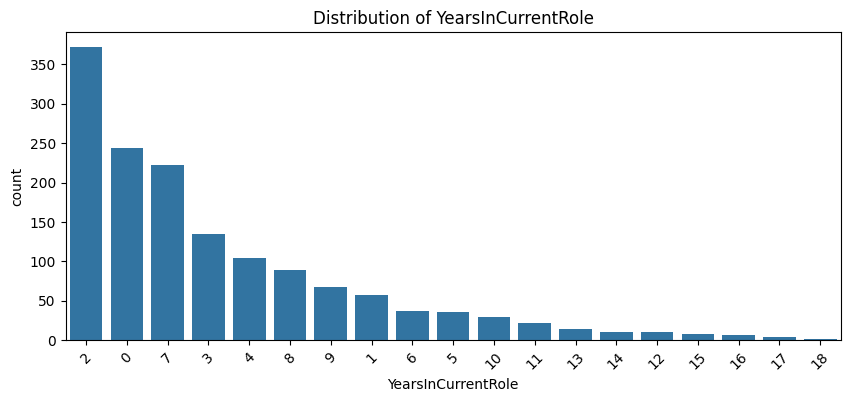

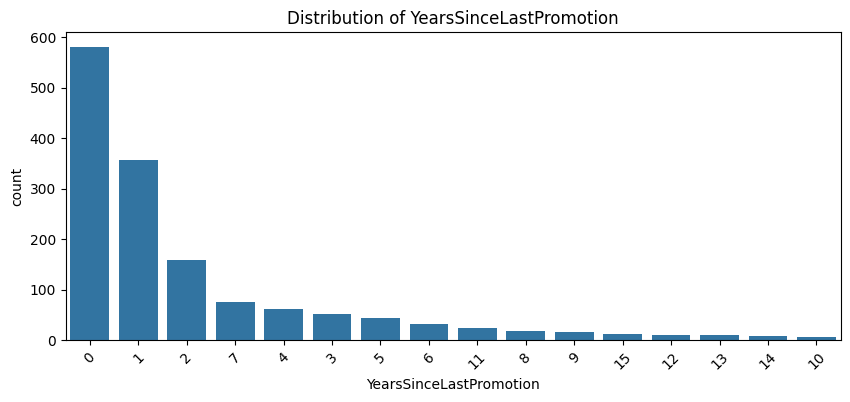

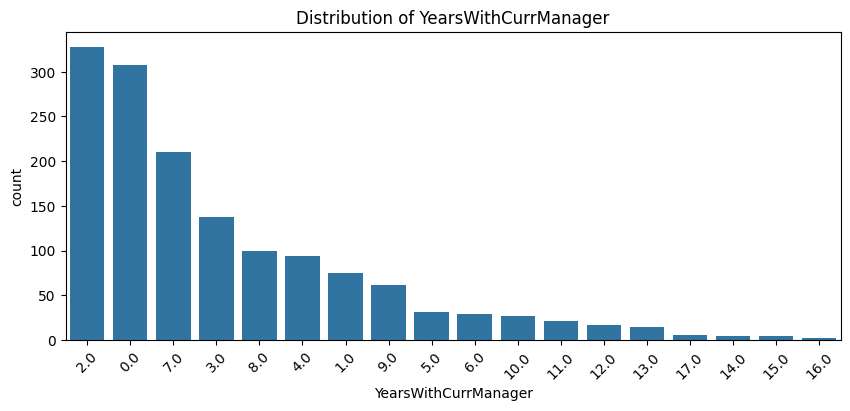

In [231]:
# Kiểm tra phân bố các biến phân loại
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

### **Key Workforce Insights - Current Company Situation**

#### **1. High Attrition & Retention Risks**  
- **16% attrition rate** with **short tenure (majority under 5 years)** suggests **high turnover and limited long-term commitment**.  
- **Few stock options, slow promotions (many at 5+ years), and lower salary brackets** may weaken **employee retention incentives**.  

#### **2. Workforce Composition & Growth Limitations**  
- **Mid-career heavy workforce (26-45 years old) with fewer senior employees** limits **leadership pipeline and mentorship**.  
- **Majority in entry/mid-level roles (Job Level 1-2), fewer senior positions**, restricting **career advancement**.  
- **Dominance of R&D and Sales with a small HR department** may **impact employee support and strategic workforce planning**.  

#### **3. Compensation & Job Satisfaction Challenges**  
- **Salary hikes mostly between 11-14% with few higher increases**, impacting **motivation and retention**.  
- **Work-life balance is moderate, but a notable percentage report dissatisfaction**; **some employees work overtime while others don’t**.  
- **Moderate-to-high job satisfaction overall, but a significant portion is disengaged**, suggesting **potential burnout or lack of motivation**.  

#### **4. Career Development & Training Gaps**  
- **Frequent role changes but slow promotions**, limiting **clear career growth paths**.  
- **Majority receive 2-3 training sessions per year, but many get little to no training**, which may **hinder skill development and future leadership potential**.  

#### **5. Diversity & HR Support Concerns**  
- **Male-dominated workforce with limited diversity** may require **inclusion efforts**.  
- **Employees primarily from scientific backgrounds, with fewer in business/HR roles**, leading to **potential gaps in cross-functional expertise**.  
- **Small HR function** may struggle with **retention strategies, workforce planning, and employee engagement initiatives**.  

---

### **Summary of Critical Concerns**
- **High turnover, slow promotions, and weak retention incentives**.  
- **Limited career growth, skill development, and leadership pipeline**.  
- **Salary constraints, job dissatisfaction, and work-life balance issues**.  
- **HR and diversity challenges impacting long-term stability**.  

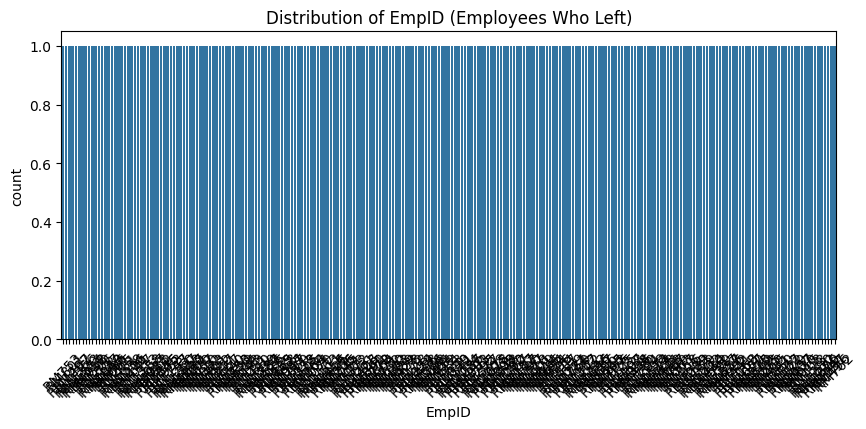

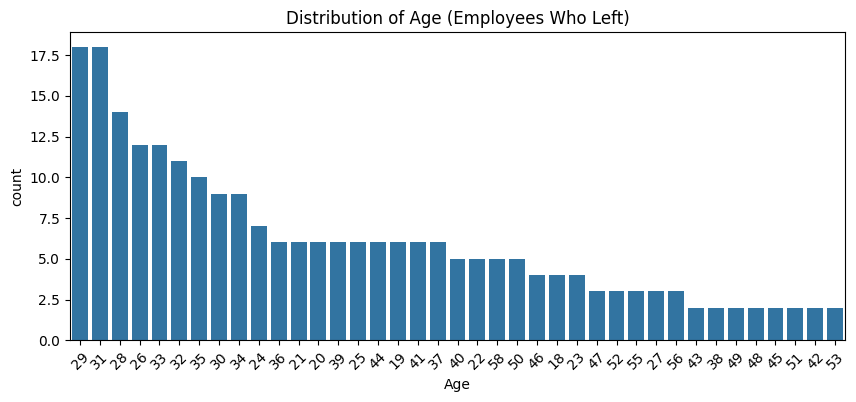

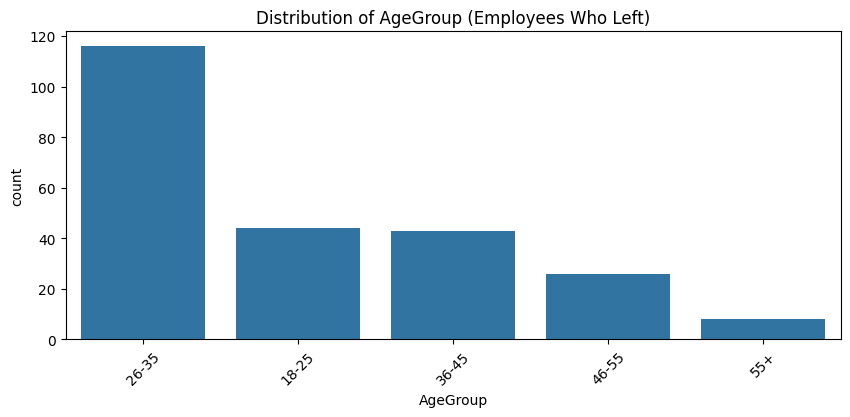

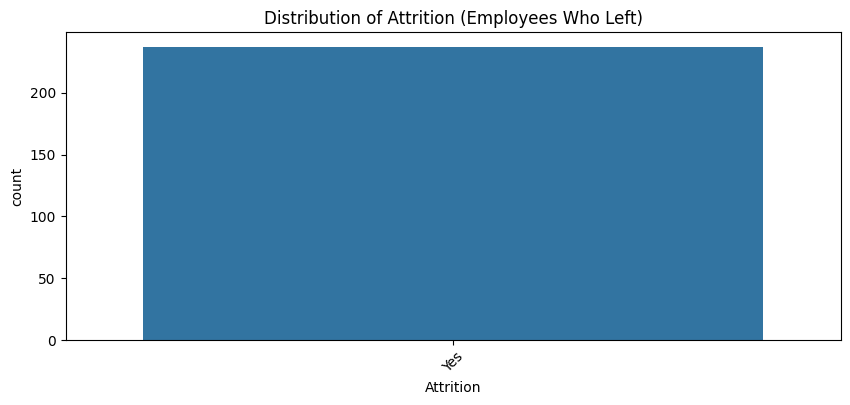

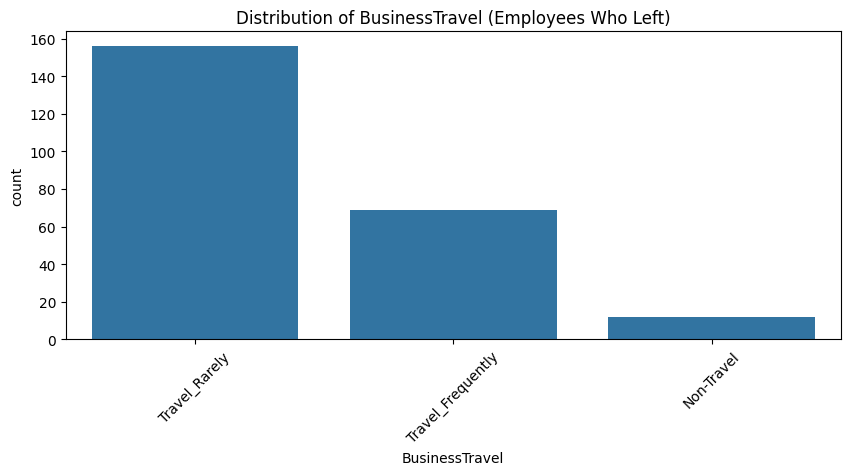

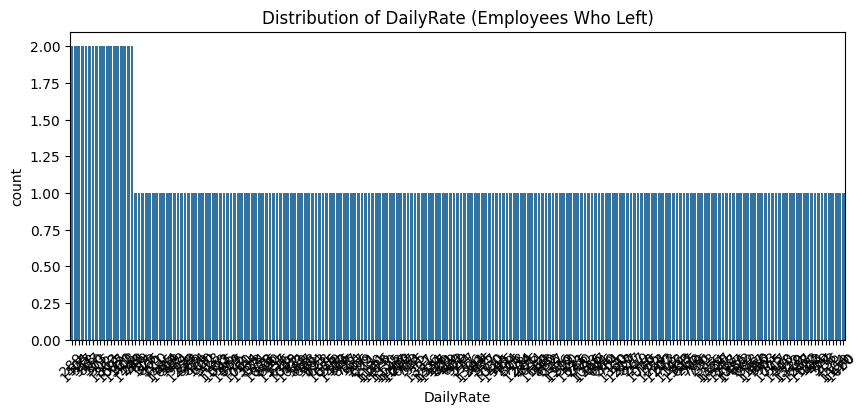

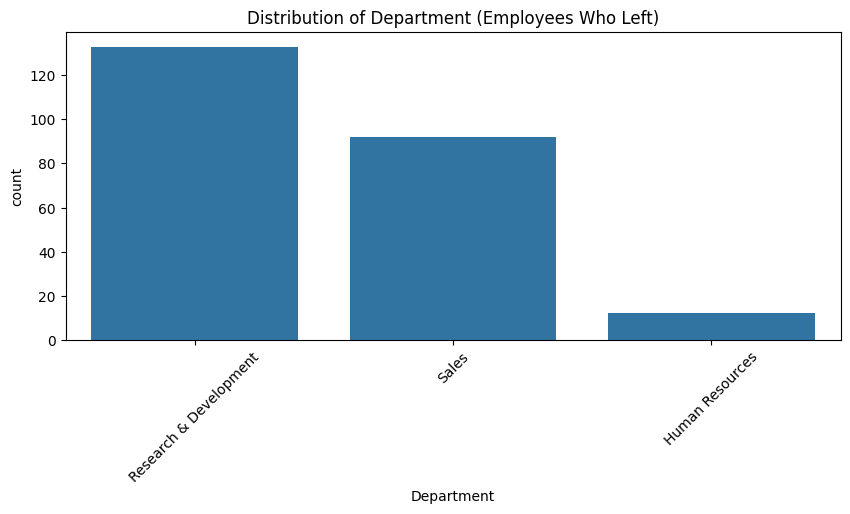

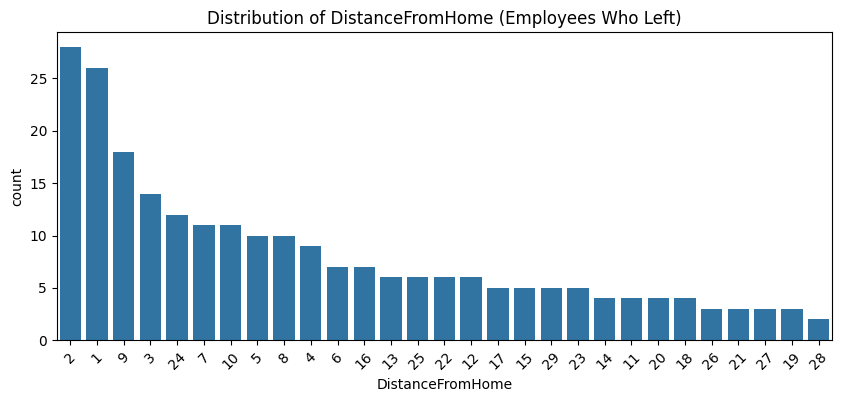

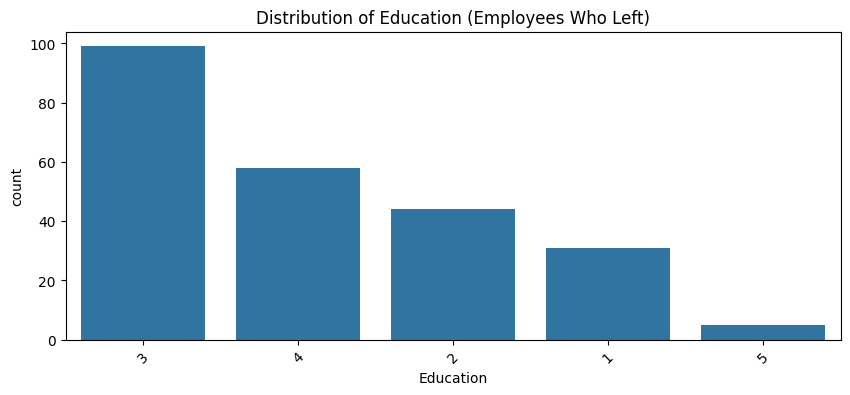

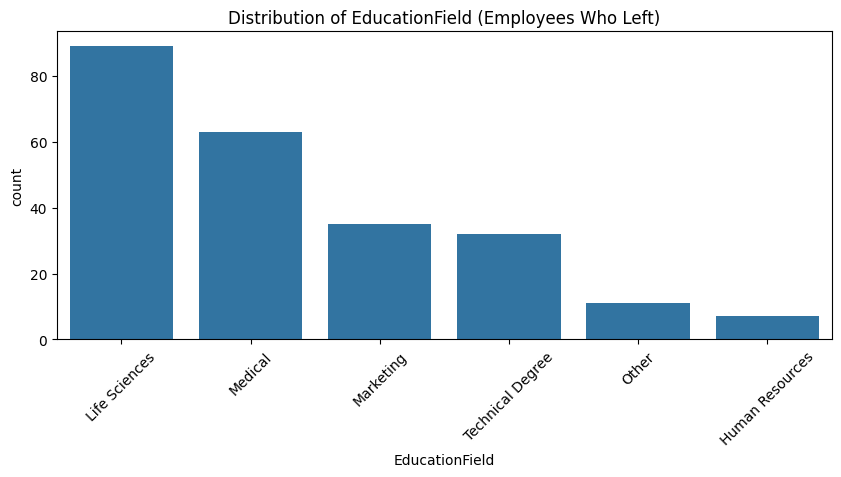

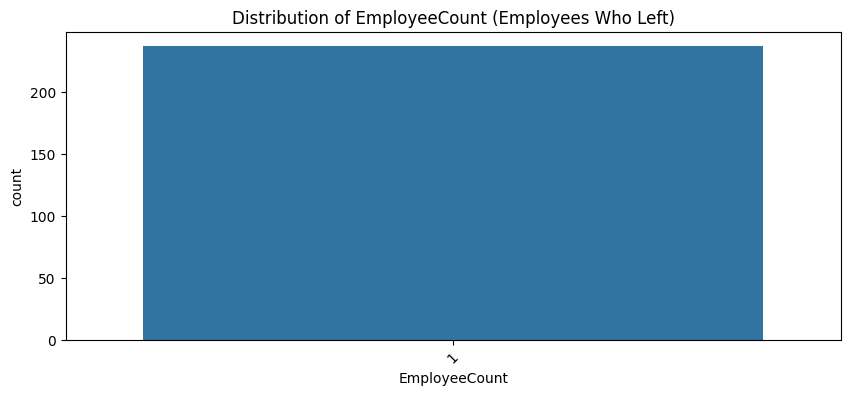

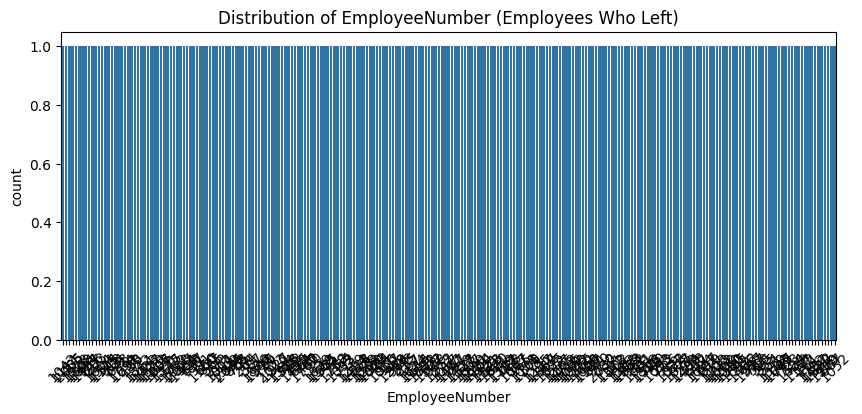

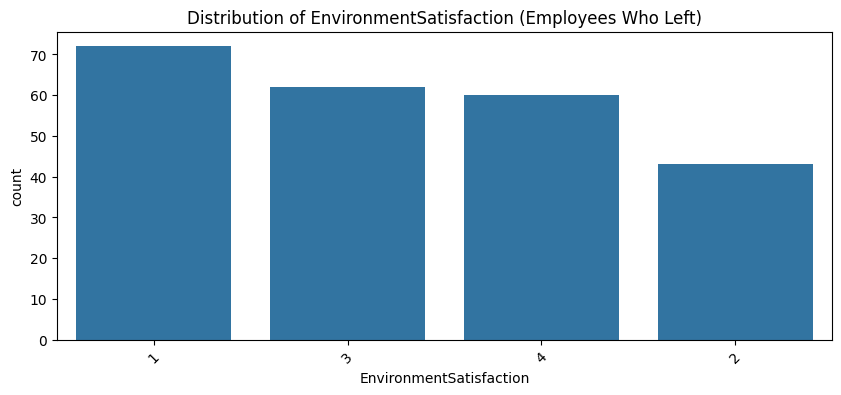

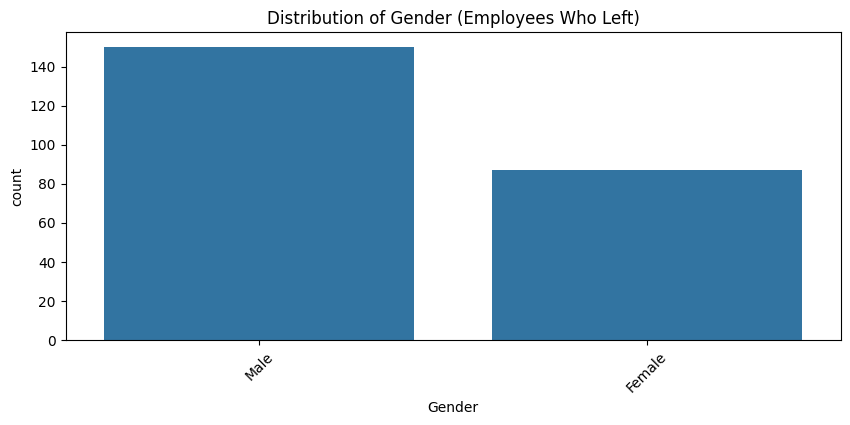

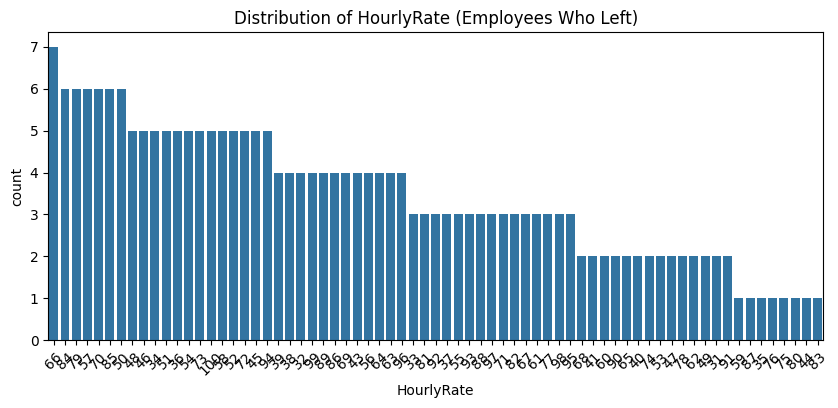

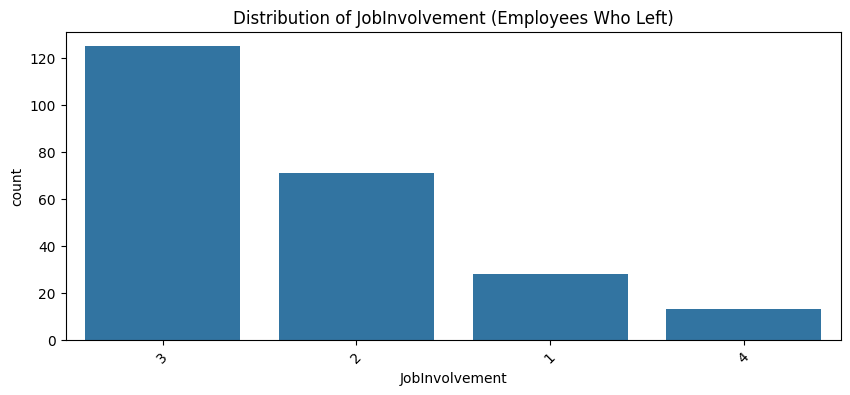

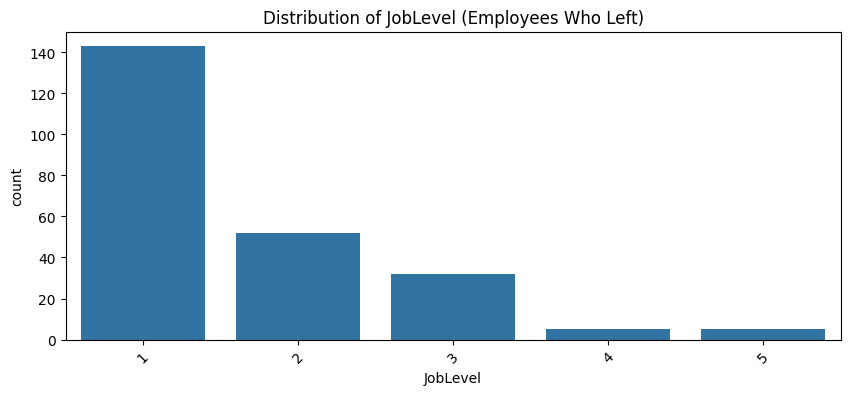

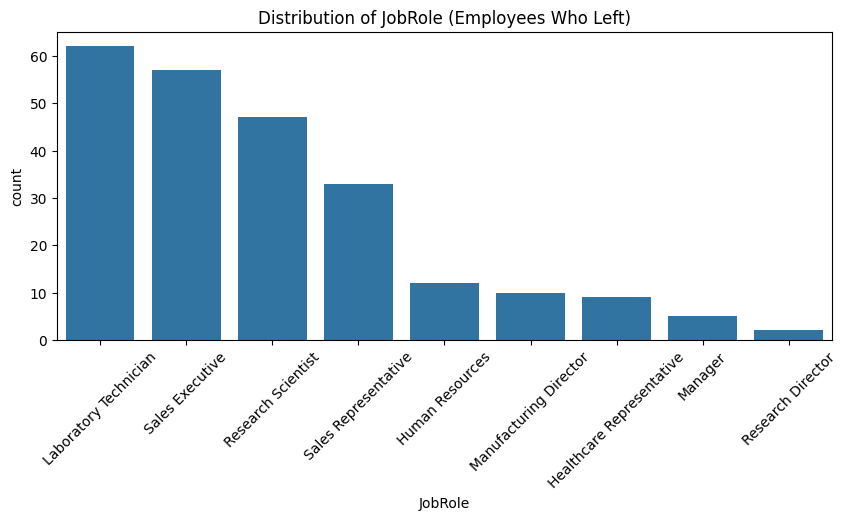

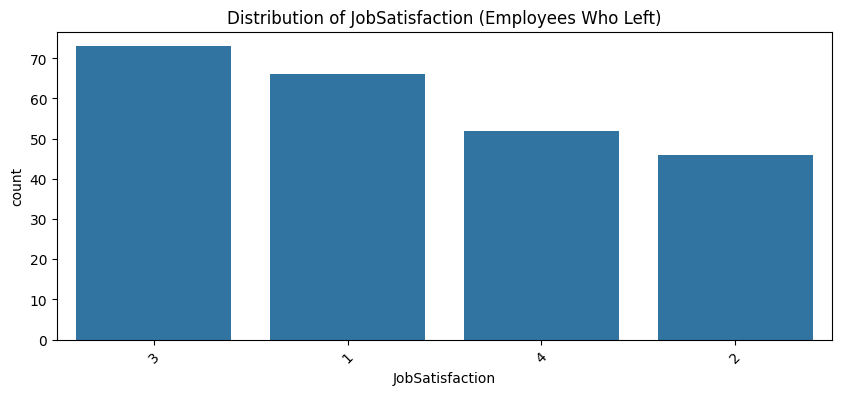

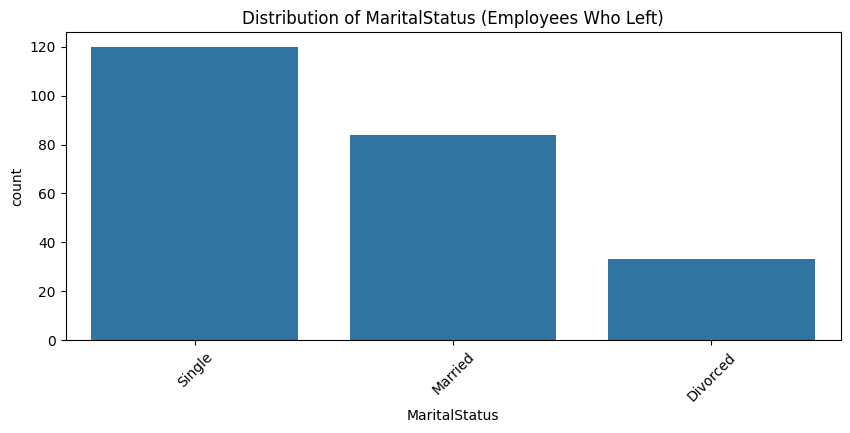

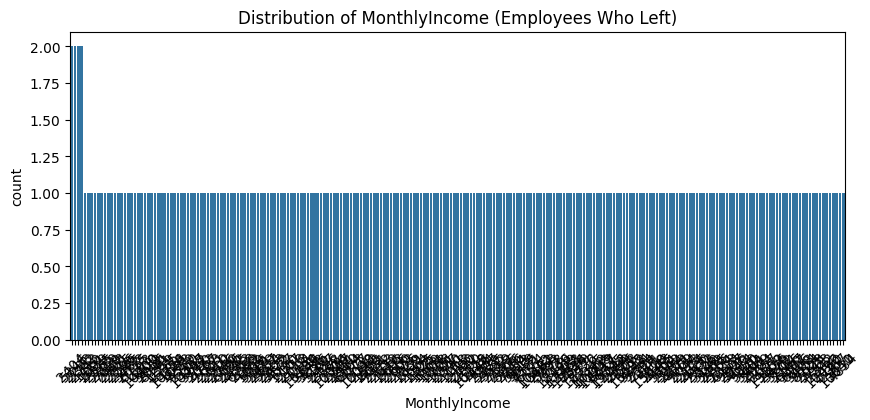

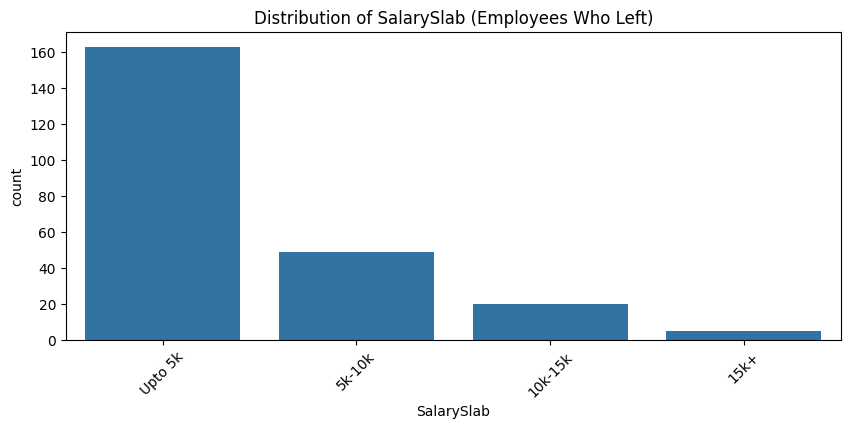

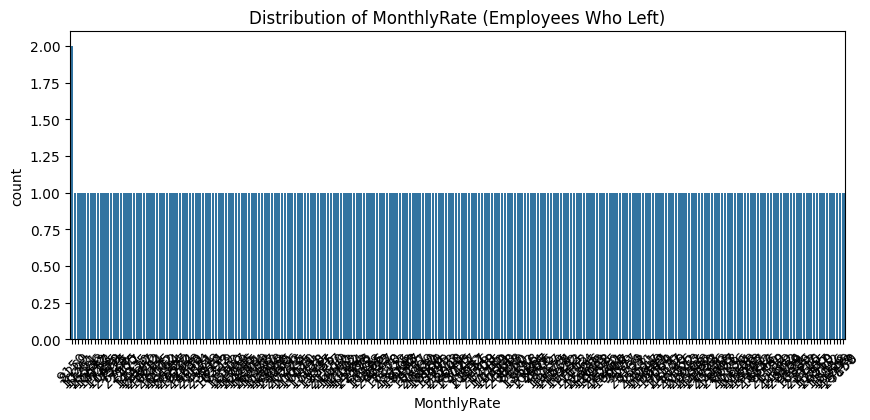

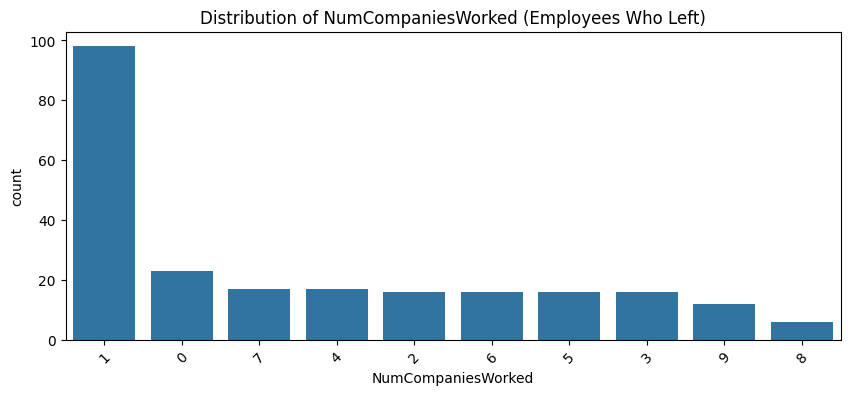

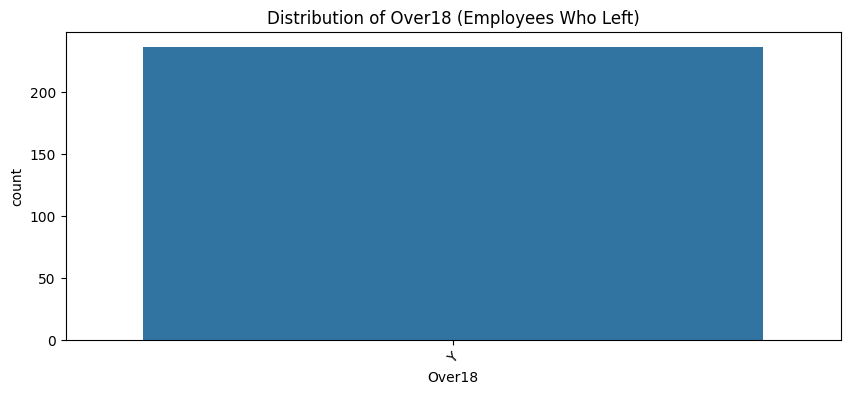

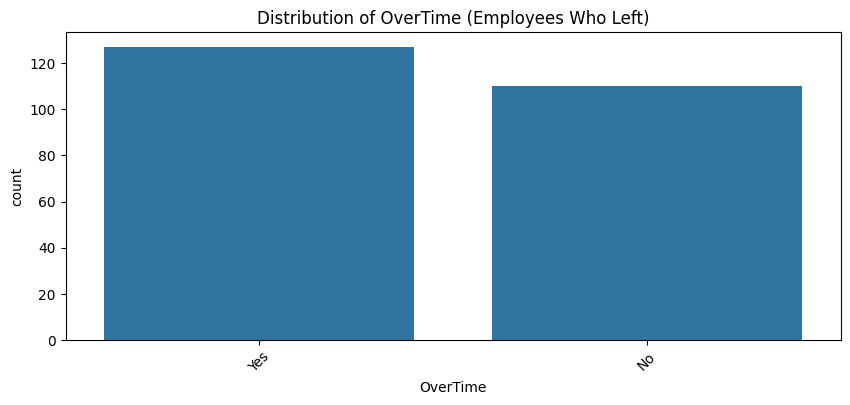

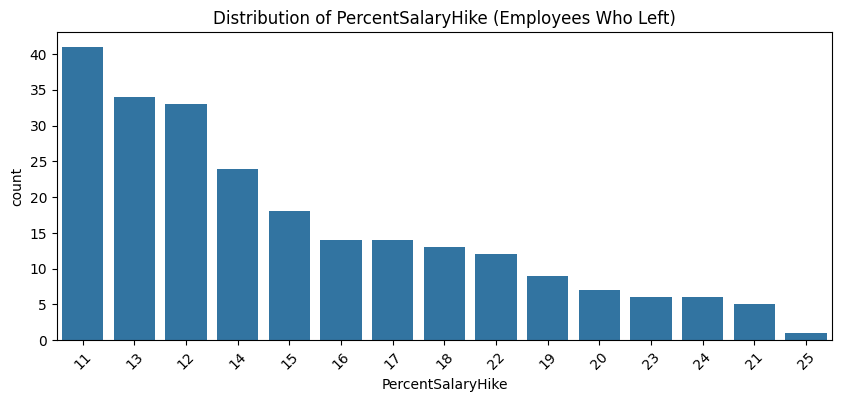

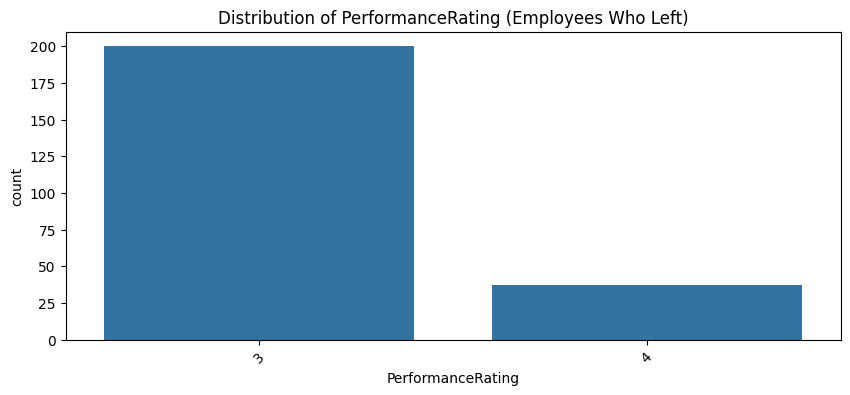

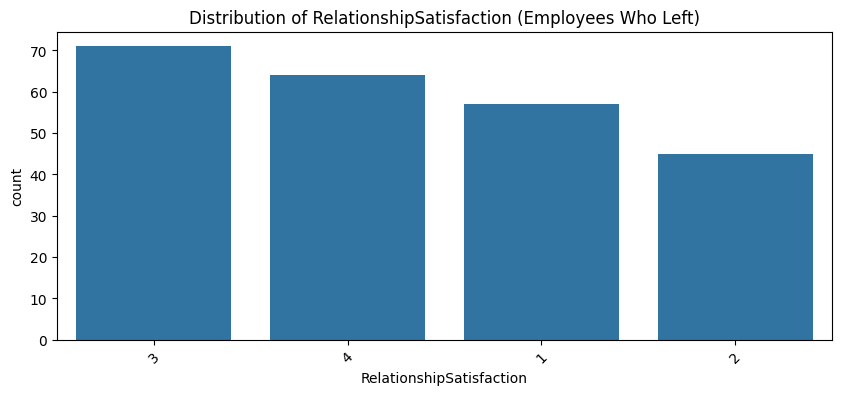

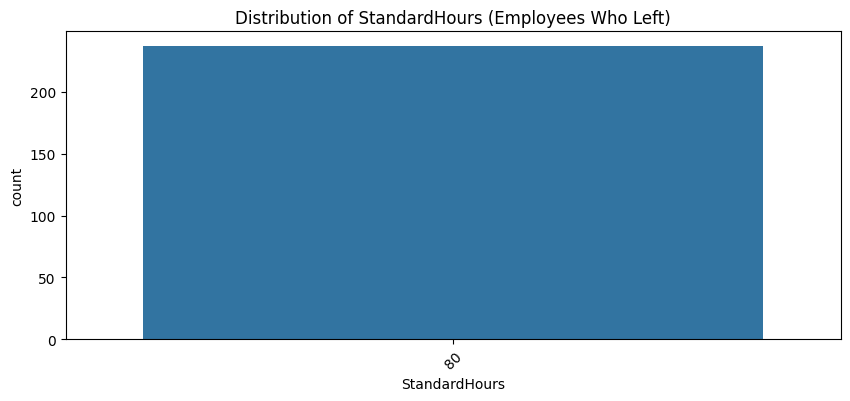

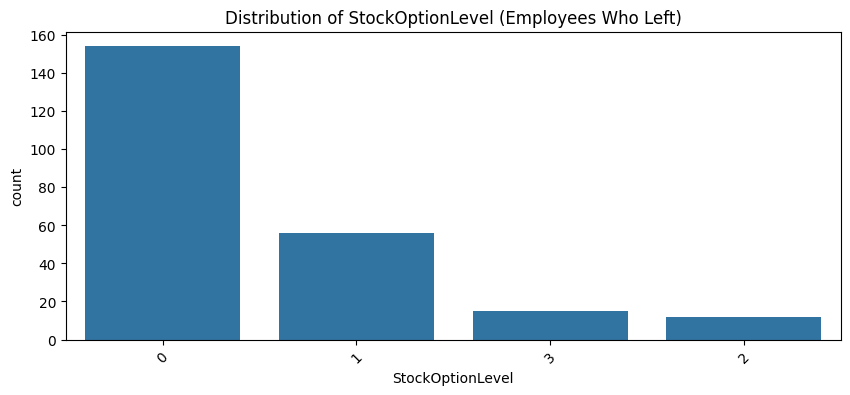

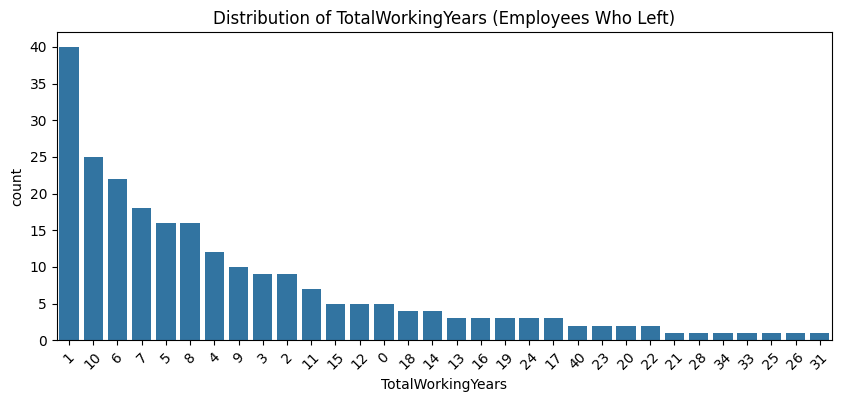

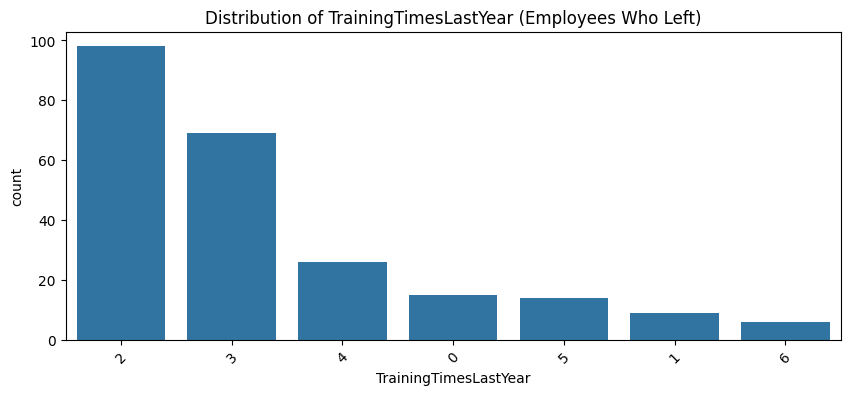

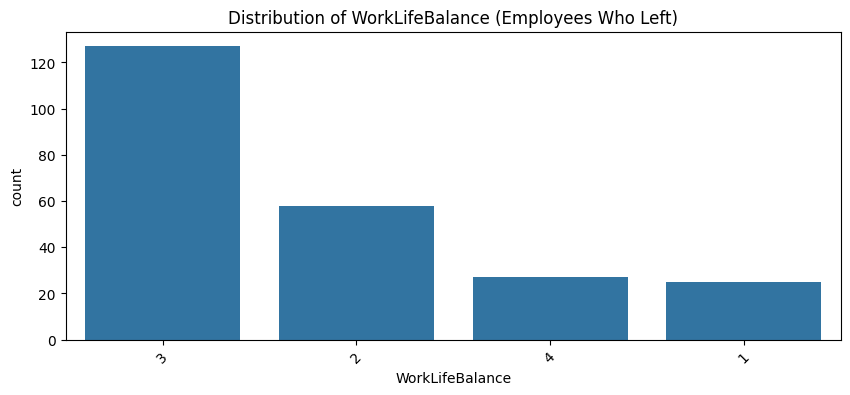

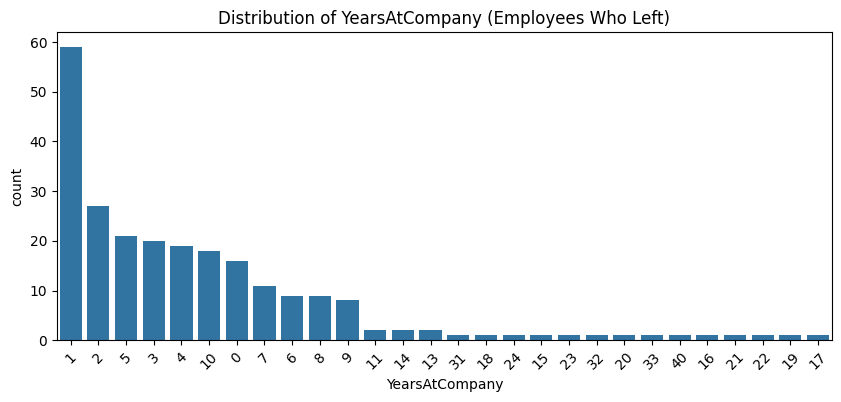

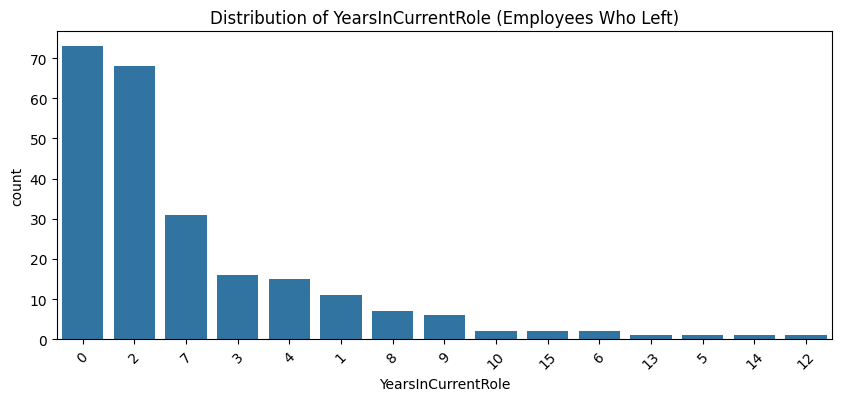

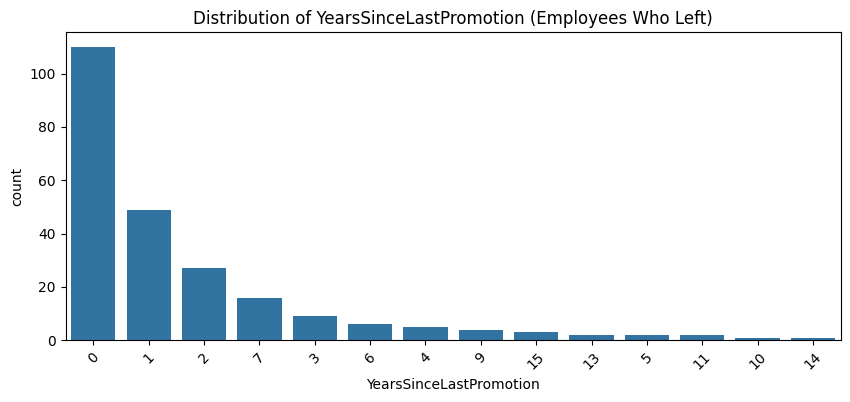

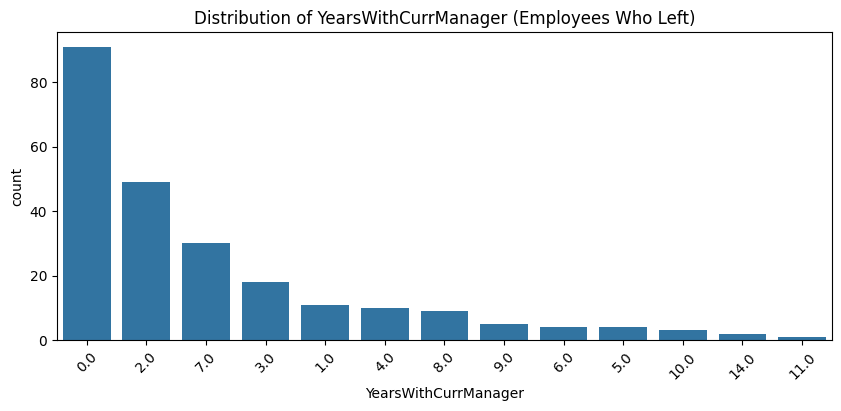

In [232]:
# Analyze records of employees who left the company
df_attrition_yes = df[df["Attrition"] == "Yes"]
for col in df_attrition_yes.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_attrition_yes, x=col, order=df_attrition_yes[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col} (Employees Who Left)")
    plt.show()

### **Identifying High-Risk Employees for Attrition**  

#### **1. Who is Likely to Leave?**  
- **Age & Experience:** Matches the company's **dominant workforce (26-35 years, 1-10 years of experience)** → Mid-career professionals are at risk.  
- **Departments & Job Roles:** **R&D and Sales** face the highest attrition → Aligns with the company's largest departments. **Lab Technicians, Sales Executives, and Research Scientists** are the most affected.  
- **Compensation & Career Growth:** Most who leave earn **<5K** and have **no recent promotions** → Matches the company’s **lower salary distribution and limited senior positions**.  
- **Work Conditions & Engagement:** Employees with **low satisfaction, job involvement, and frequent overtime** leave more → Similar concerns exist in the company.  
- **Managerial Relationships:** High attrition among those with **<2 years under their current manager** → A warning for **newly managed teams**.  

#### **2. Key Differences & Risks for the Company**  
- **Company's workforce is dominated by the same age and experience group that faces the highest attrition risk** → Retention strategies needed.  
- **High-risk job roles (Lab Techs, Sales Executives) are essential to business operations** → Losing them impacts productivity.  
- **Promotion bottlenecks and low salary growth mirror attrition trends** → Without career progression, more employees may leave.  
- **Overtime and low satisfaction are already present issues** → Burnout may worsen retention.  

#### **3. Retention Strategies**  
- **Accelerate career growth**: Internal mobility and structured promotions.  
- **Enhance compensation**: Competitive salary hikes, stock options for retention.  
- **Improve work conditions**: Reduce overtime, enhance managerial engagement.  
- **Monitor new manager transitions**: Strengthen leadership training to prevent disengagement.  

# ========================================
# 📌 5. Data Preprocessing
# ========================================

In [233]:
# Drop unnecessary columns
df = df.drop(columns="EmpID")

In [234]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # Cột phân loại (dạng chuỗi)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Cột số


In [235]:
# One-Hot Encoding for categorical variables
ohe = OneHotEncoder(sparse_output=False, drop='first')  # sparse=False để nhận DataFrame, drop='first' để tránh multicollinearity
encoded_categorical = ohe.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_categorical, columns=ohe.get_feature_names_out(categorical_cols))

In [236]:
# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)

In [237]:
# Combine processed data
X = pd.concat([scaled_df, encoded_df], axis=1)

In [238]:
# Convert Attrition into binary values
y = df["Attrition"].replace({"Yes": 1, "No": 0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_19392\197324681.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["Attrition"].replace({"Yes": 1, "No": 0})


# ========================================
# 📌 6. Handle Imbalanced Data with SMOTE
# ========================================

In [239]:
# Handle Imbalanced Data with SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Tăng lớp thiểu số lên 50% so với lớp đa số
X_resampled, y_resampled = smote.fit_resample(X, y)

In [240]:
# Verify class distribution after SMOTE
print("Class distribution after SMOTE:\n", y_resampled.value_counts(normalize=True))

Class distribution after SMOTE:
 Attrition
0    0.666847
1    0.333153
Name: proportion, dtype: float64



# ========================================
# 📌 7. Split Dataset into Training and Test Sets
# ========================================

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (1479, 55), Test set size: (370, 55)


# ========================================
# 📌 10. Train Logistic Regression Model
# ========================================

In [242]:
# Train Logistic Regression Model
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# ========================================
# 📌 11. Make Predictions and Evaluate Model
# ========================================

In [243]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Extract probability for class 1 (employees leaving)


In [244]:
# Evaluate model performance using common metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [245]:
#  Display Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[247   0]
 [  0 123]]


In [246]:
# Generate Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       123

    accuracy                           1.00       370
   macro avg       1.00      1.00      1.00       370
weighted avg       1.00      1.00      1.00       370



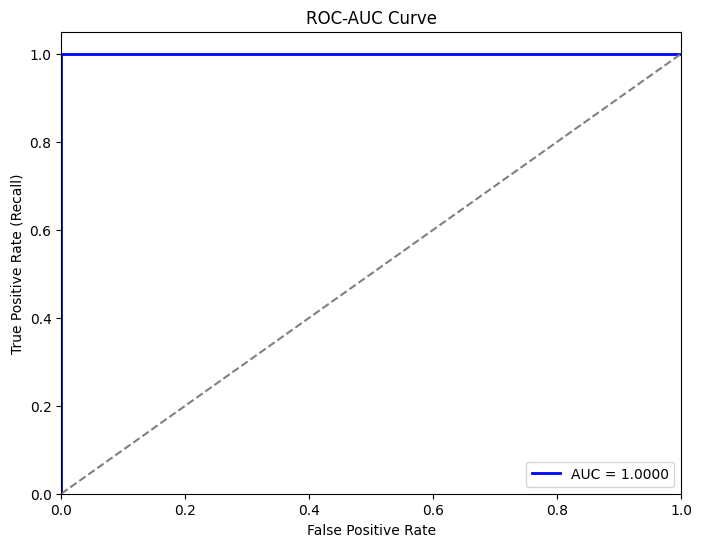

In [247]:
#  Plot ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle="--")  # Đường chéo 50-50
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

### **Model Evaluation and Analysis**

#### **1. Model Performance Overview**
The model achieves **perfect scores** across all key metrics:
- **Accuracy**: 1.0000
- **Precision**: 1.0000
- **Recall**: 1.0000
- **F1-Score**: 1.0000
- **AUC (Area Under Curve)**: 1.0000

These results suggest that the model **perfectly classifies all instances** without any misclassification.

#### **2. Explanation of Metrics**
- **Accuracy (1.0000)**: The model correctly classified 100% of the test samples.
- **Precision (1.0000)**: All positive predictions made by the model were correct.
- **Recall (1.0000)**: The model identified all actual positives.
- **F1-Score (1.0000)**: Since precision and recall are both perfect, the F1-score is also at its maximum.
- **Confusion Matrix**: No false positives or false negatives exist, meaning no classification errors.
- **ROC-AUC Curve (AUC = 1.0000)**: The model has a **perfect separation between classes**, which is **highly unrealistic** in real-world scenarios.

#### **3. Why is the Model Unrealistic?**
- **Dataset Bias**: This dataset is designed specifically for training models, possibly with **cleaned and well-separated features**, making it unrealistic for deployment in real-world settings.
- **Lack of Noise**: Real-world datasets usually have **ambiguous or overlapping data points**, leading to **some misclassifications**. Here, the dataset likely lacks such complexity.

#### **4. Key Takeaways**
- **This model does not represent real-world performance** and should not be considered deployable.
- The dataset should be tested on a **more diverse, unseen, or noisy dataset** to evaluate true generalization.
- Potential solutions:
  - Introduce **data augmentation** or **noise** to the dataset.
  - Evaluate on a **real-world dataset** instead of a Kaggle-specific training set.
  - Use **cross-validation** to ensure the model isn't just memorizing the data.
